### Exercise 5 using UCI Wine Dataset

In [1]:
from sklearn.datasets import load_wine
samples, labels = load_wine(return_X_y = True)

# Note: dim(samples) = 178 x 13

#### Standardization of Data
###### 1. Centering wine dataset so each attribute has zero mean

In [2]:
import numpy as np

# Arranging data so columns are samples, rows are attributes
# dim(X) = 13 x 178
X = samples.T

# Mean vector of empirical data and tiled mean matrix
mean_vec = X.mean(axis = 1)
mean_mat = np.tile(mean_vec.reshape(X.shape[0],1),[1,X.shape[1]])

# Centered data matrix
X_centered = X - mean_mat

###### 2. Computing two-dimensional PCA features of centered wine dataset

In [3]:
from numpy import linalg as LA

# SVD(X_centered)
U, S, Vt = LA.svd(X_centered)

# Top 2 principal components of centered data matrix
U2 = U[:, 0:2]

# Computing PCA based features of centered data matrix using top 2 principal components
# dim(X_tilde) = 2 x 178
X_tilde = U2.T.dot(X_centered)

Scatter plot for labels '0' as red squares, '1' as green triangles, '2' as blue circles

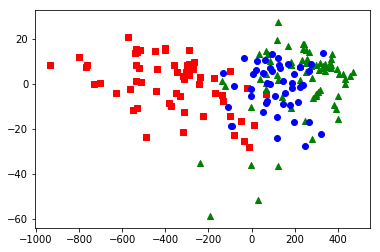

In [29]:
from matplotlib import pyplot as plt

plt.scatter(X_tilde.T[np.where(labels==0),0],X_tilde.T[np.where(labels==0),1],c='r',marker='s')
plt.scatter(X_tilde.T[np.where(labels==1),0],X_tilde.T[np.where(labels==1),1],c='g',marker='^')
plt.scatter(X_tilde.T[np.where(labels==2),0],X_tilde.T[np.where(labels==2),1],c='b',marker='o')
plt.show()

###### 3. Normalizing centered wine dataset so each attribute has unit empirical variance using:    $X_{Standardized} = \frac{X - \mu}{\sigma} = \frac{X_{centered}}{\sigma} $

In [5]:
from numpy import *

# Just for initialization purposes***
X_standard = X_centered

# Normalizing each row attribute from X_centered, storing in X_standard
for row in range(0, 13):
    attribute = X_centered[row, :]
    std_attribute = attribute / std(attribute)
    X_standard[row, :] = std_attribute
    
# Variance of each row attribute is now unity
variances = var(X_standard, axis = 1)
display(variances)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

###### 4. Computing two-dimensional PCA features of standardized wine dataset

In [6]:
# SVD(X_standard)
U_stand, S_stand, Vt_stand = LA.svd(X_standard)

# Top 2 principal components of standardized data matrix
U2_stand = U_stand[:, 0:2]

# Computing PCA based features of standardized data matrix using top 2 principal components
# dim(X_tilde_stand) = 2 x 178
X_tilde_stand = U2_stand.T.dot(X_standard)

Scatter plot for labels '0' as red squares, '1' as green triangles, '2' as blue circles

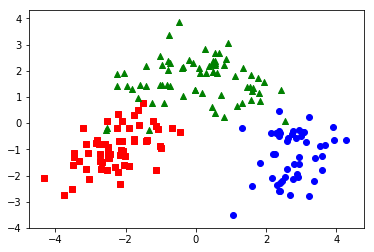

In [7]:
plt.scatter(X_tilde_stand.T[np.where(labels==0),0],X_tilde_stand.T[np.where(labels==0),1],c='r',marker='s')
plt.scatter(X_tilde_stand.T[np.where(labels==1),0],X_tilde_stand.T[np.where(labels==1),1],c='g',marker='^')
plt.scatter(X_tilde_stand.T[np.where(labels==2),0],X_tilde_stand.T[np.where(labels==2),1],c='b',marker='o')
plt.show()

###### 5. Discussing PCA features from standardized versus centered data

From the two plots above, standardizing data would lead to better classification performance. From a visual point of view, we can clearly see the seperation is larger between classes decreasing the likelihood for misclassification. Standardizing features to be centered around 0 and having a variation (or standard deviation) of 1 is important especially when comparing measurements with different features. Since PCA essentially analyzes variances of the different features, standardization can be considered a crucial requirement. The main effect standardizing has on PCA comes from the scaling of covariance between pairs of variables by the product of the standard deviations of each pair of variables.

#### Naive Bayes Classification
###### 1. Building naive Bayes classifier

In [8]:
import math

# Find both attribute means for particular class instances
# Find both attribute variances for particular class instances
# Inputs: Dataset with concatenated labels, class label
def AttributeMeansVars(dataset, class_label):
    feature1_values = []
    feature2_values = []
    # Loop through each column checking for label
    for i in range(0,len(dataset[0])):
        label = dataset[len(dataset) - 1, i]
        if(label == class_label):
            feature1_values.append(dataset[0,i])
            feature2_values.append(dataset[1,i])
    # Compute attribute means
    feature1_mean = mean(feature1_values)
    feature2_mean = mean(feature2_values)
    # Compute attribute variances
    feature1_var = var(feature1_values)
    feature2_var = var(feature2_values)
    # Return means, variances for both attributes
    return feature1_mean, feature1_var, feature2_mean, feature2_var 


# Gaussian PDF - used for posterior probability in Gaussian Naive Bayes Classifier below
def GaussianPDF(x, mean, variance):
    denominator = (2 * math.pi * variance)**.5
    numerator = math.exp((-(float(x)-float(mean))**2)/(2*variance))
    return numerator/denominator


# Gaussian Naive Bayes Classifier Model
def GaussNaiveBayesModel(dataset):
    # Return summaries as list for each class
    model = []
    
    # Class 0: finding feature means, variances for this class
    # 2 features so we will have 2 means and 2 variances for this class
    class0_mean1, class0_var1, class0_mean2, class0_var2 = AttributeMeansVars(dataset, 0)
    model.append(class0_mean1)
    model.append(class0_var1)
    model.append(class0_mean2)
    model.append(class0_var2)
    
    # Class 1: finding feature means, variances for this class
    # 2 features so we will have 2 means and 2 variances for this class
    class1_mean1, class1_var1, class1_mean2, class1_var2 = AttributeMeansVars(dataset, 1)
    model.append(class1_mean1)
    model.append(class1_var1)
    model.append(class1_mean2)
    model.append(class1_var2)
    
    # Class 1: finding feature means, variances for this class
    # 2 features so we will have 2 means and 2 variances for this class
    class2_mean1, class2_var1, class2_mean2, class2_var2 = AttributeMeansVars(dataset, 2) 
    model.append(class2_mean1)
    model.append(class2_var1)
    model.append(class2_mean2)
    model.append(class2_var2)
    
    return model


def PosteriorProbabilities(model, x1, x2):
    # X1, X2 posterior using model: Class 2
    pdf_feature1_class0 = GaussianPDF(x1, model[0], model[1])
    pdf_feature2_class0 = GaussianPDF(x2, model[2], model[3])
    # Posterior Class 0
    post_class0 = pdf_feature1_class0 * pdf_feature2_class0
    
    # X1, X2 posterior using model: Class 1
    pdf_feature1_class1 = GaussianPDF(x1, model[4], model[5])
    pdf_feature2_class1 = GaussianPDF(x2, model[6], model[7])
    # Posterior Class 1
    post_class1 = pdf_feature1_class1 * pdf_feature2_class1
    
    # X1, X2 posterior using model: Class 2
    pdf_feature1_class2 = GaussianPDF(x1, model[8], model[9])
    pdf_feature2_class2 = GaussianPDF(x2, model[10], model[11])
    # Posterior Class 2
    post_class2 = pdf_feature1_class2 * pdf_feature2_class2
    
    return post_class0, post_class1, post_class2
    
    
# Choose max posterior of the three classes
def Predict(prob_class0, prob_class1, prob_class2):
    # Choose max posterior of the three classes
    if(prob_class0 > prob_class1 and prob_class0 > prob_class2):
        return 0
    if(prob_class1 > prob_class0 and prob_class1 > prob_class2):
        return 1
    if(prob_class2 > prob_class0 and prob_class2 > prob_class1):
        return 2
    
    
# Gaussian Naive Bayes Classifier
# Inputs: model summary, test data
def GaussNaiveBayesClassify(model, test):
    # Return each test sample prediction in a list
    predictions = []
    # Number of test samples
    num_test_samples = len(test[0])
    
    for i in range(0, num_test_samples):
        x1 = test[0, i]
        x2 = test[1, i]
        # Compute the posterior probabilities using model and new inputs
        prob_class0, prob_class1, prob_class2 = PosteriorProbabilities(model, x1, x2)
        prediction = Predict(prob_class0, prob_class1, prob_class2)
        actual_label = test[2, i]
        predictions.append([prediction,actual_label])
    return predictions


# Calculate classifier accuracy, each list element is a tuple with prediction, label
def GetAccuracy(predictions):
    correct_count = 0;
    num_predictions = len(predictions)
    for i in range(0, num_predictions):
        list_tuple = predictions[i]
        prediction = list_tuple[0]
        label = list_tuple[1]
        if(prediction == label):
            correct_count += 1
    return correct_count / num_predictions

###### 2. Gaussian Naive Bayes classifier with K-fold cross validation: K = 5

In [9]:
# Method to fold evenly/unevenly, returns list of numpy arrays
def KFolds(dataset, k):
    # Return this list of numpyarrays
    folds = []
    
    # Number of samples to divide
    num_samples = len(dataset[0])
    
    # Each fold sample size
    fold_size = math.floor(num_samples / k)
    
    # Remaining samples for uneven folds
    remainder_size = num_samples % k
    
    # Even fold case
    if(remainder_size == 0):
        samples_left = num_samples
        i = 0;
        while(samples_left != 0):
            start_index = int(i * fold_size)
            end_index = int((i + 1) * fold_size)
            folds.append(dataset[:, start_index:end_index])
            samples_left -= fold_size
            i += 1
            
    # Uneven fold case
    # Do the same thing then distribute remaining columns among folds
    if(remainder_size != 0):
        samples_left = k * fold_size
        i = 0;
        while(samples_left != 0):
            start_index = int(i * fold_size)
            end_index = int((i + 1) * fold_size)
            folds.append(dataset[:, start_index:end_index])
            samples_left -= fold_size
            i += 1
        for j in range(0, remainder_size):
            arr = folds[len(folds) - (j + 1)]
            column = dataset[:, num_samples - (j + 1)]
            folds[len(folds) - (j + 1)] = np.c_[arr, column]           
            
    return folds

###### Case I: Using two dimensional PCA features of centered data for classification

In [10]:
# Concatenating labels as last row to two dimensional PCA features of centered data
data_case1 = np.c_[X_tilde.T, labels].T

# Randomly shuffle dataset by columns before K-folding
np.random.shuffle(data_case1.T)

# Partition into K = 5 folds
folds_case1 = KFolds(data_case1, 5)

# Case 1 accuracies for all K folds
case1_accuracies = []

###### First Iteration:  Test Data using Fold 5 & Training Data using Folds 1 - 4

In [11]:
# Seperate folds into train data and test data
first_train_case1 = np.c_[folds_case1[0], folds_case1[1], folds_case1[2], folds_case1[3]]
first_test_case1 = folds_case1[4]

# Train Gaussian Naive Bayes Model using Folds 1 - 4
first_train_case1_model = GaussNaiveBayesModel(first_train_case1)

# Test Fold 5
first_predictions_case1 = GaussNaiveBayesClassify(first_train_case1_model, first_test_case1)

# Computing accuracy
case1_fifth_fold_accuracy = GetAccuracy(first_predictions_case1)
display("Accuracy: ", case1_fifth_fold_accuracy)

# Append accuracy to list of Case 1 accuracies
case1_accuracies.append(case1_fifth_fold_accuracy)

'Accuracy: '

0.6944444444444444

###### Second Iteration:  Test Data using Fold 4 & Training Data using Folds 1 - 3, 5

In [12]:
# Seperate folds into train data and test data
second_train_case1 = np.c_[folds_case1[0], folds_case1[1], folds_case1[2], folds_case1[4]]
second_test_case1 = folds_case1[3]

# Train Gaussian Naive Bayes Model using Folds 1 - 3, 5
second_train_case1_model = GaussNaiveBayesModel(second_train_case1)

# Test Fold 4
second_predictions_case1 = GaussNaiveBayesClassify(second_train_case1_model, second_test_case1)

# Computing accuracy
case1_fourth_fold_accuracy = GetAccuracy(second_predictions_case1)
display("Accuracy: ", case1_fourth_fold_accuracy)

# Append accuracy to list of Case 1 accuracies
case1_accuracies.append(case1_fourth_fold_accuracy)

'Accuracy: '

0.8333333333333334

###### Third Iteration:  Test Data using Fold 3 & Training Data using Folds 1 - 2, 4 - 5

In [13]:
# Seperate folds into train data and test data
third_train_case1 = np.c_[folds_case1[0], folds_case1[1], folds_case1[3], folds_case1[4]]
third_test_case1 = folds_case1[2]

# Train Gaussian Naive Bayes Model using Folds 1 - 2, 4 - 5
third_train_case1_model = GaussNaiveBayesModel(third_train_case1)

# Test Fold 3
third_predictions_case1 = GaussNaiveBayesClassify(third_train_case1_model, third_test_case1)

# Computing accuracy
case1_third_fold_accuracy = GetAccuracy(third_predictions_case1)
display("Accuracy: ", case1_third_fold_accuracy)

# Append accuracy to list of Case 1 accuracies
case1_accuracies.append(case1_third_fold_accuracy)

'Accuracy: '

0.8055555555555556

###### Fourth Iteration:  Test Data using Fold 2 & Training Data using Folds 1, 3 - 5

In [14]:
# Seperate folds into train data and test data
fourth_train_case1 = np.c_[folds_case1[0], folds_case1[2], folds_case1[3], folds_case1[4]]
fourth_test_case1 = folds_case1[1]

# Train Gaussian Naive Bayes Model using Folds 1, 3 - 5
fourth_train_case1_model = GaussNaiveBayesModel(fourth_train_case1)

# Test Fold 2
second_predictions_case1 = GaussNaiveBayesClassify(fourth_train_case1_model, fourth_test_case1)

# Computing accuracy
case1_second_fold_accuracy = GetAccuracy(second_predictions_case1)
display("Accuracy: ", case1_second_fold_accuracy)

# Append accuracy to list of Case 1 accuracies
case1_accuracies.append(case1_second_fold_accuracy)

'Accuracy: '

0.8285714285714286

###### Fifth Iteration:  Test Data using Fold 1 & Training Data using Folds 2 - 5

In [15]:
# Seperate folds into train data and test data
fifth_train_case1 = np.c_[folds_case1[1], folds_case1[2], folds_case1[3], folds_case1[4]]
fifth_test_case1 = folds_case1[0]

# Train Gaussian Naive Bayes Model using Folds 1, 3 - 5
fifth_train_case1_model = GaussNaiveBayesModel(fifth_train_case1)

# Test Fold 1
first_predictions_case1 = GaussNaiveBayesClassify(fifth_train_case1_model, fifth_test_case1)

# Computing accuracy
case1_first_fold_accuracy = GetAccuracy(first_predictions_case1)
display("Accuracy: ", case1_first_fold_accuracy)

# Append accuracy to list of Case 1 accuracies
case1_accuracies.append(case1_first_fold_accuracy)

'Accuracy: '

0.6571428571428571

###### Case II: Using two dimensional PCA features of standardized data for classification

In [16]:
# Concatenating labels as last row to two dimensional PCA features of standardized data
data_case2 = np.c_[X_tilde_stand.T, labels].T

# Randomly shuffle dataset by columns before K-folding
np.random.shuffle(data_case2.T)

# Partition into K = 5 folds
folds_case2 = KFolds(data_case2, 5)

# Case 2 accuracies for all K folds
case2_accuracies = []

###### First Iteration:  Test Data using Fold 5 & Training Data using Folds 1 - 4

In [17]:
# Seperate folds into train data and test data
first_train_case2 = np.c_[folds_case2[0], folds_case2[1], folds_case2[2], folds_case2[3]]
first_test_case2 = folds_case2[4]

# Train Gaussian Naive Bayes Model using Folds 1 - 4
first_train_case2_model = GaussNaiveBayesModel(first_train_case2)

# Test Fold 5
first_predictions_case2 = GaussNaiveBayesClassify(first_train_case2_model, first_test_case2)

# Computing accuracy
case2_fifth_fold_accuracy = GetAccuracy(first_predictions_case2)
display("Accuracy: ", case2_fifth_fold_accuracy)

# Append accuracy to list of Case 2 accuracies
case2_accuracies.append(case2_fifth_fold_accuracy)

'Accuracy: '

1.0

###### Second Iteration:  Test Data using Fold 4 & Training Data using Folds 1 - 3, 5

In [18]:
# Seperate folds into train data and test data
second_train_case2 = np.c_[folds_case2[0], folds_case2[1], folds_case2[2], folds_case2[4]]
second_test_case2 = folds_case2[3]

# Train Gaussian Naive Bayes Model using Folds 1 - 3, 5
second_train_case2_model = GaussNaiveBayesModel(second_train_case2)

# Test Fold 4
second_predictions_case2 = GaussNaiveBayesClassify(second_train_case2_model, second_test_case2)

# Computing accuracy
case2_fourth_fold_accuracy = GetAccuracy(second_predictions_case2)
display("Accuracy: ", case2_fourth_fold_accuracy)

# Append accuracy to list of Case 2 accuracies
case2_accuracies.append(case2_fourth_fold_accuracy)

'Accuracy: '

0.9444444444444444

###### Third Iteration:  Test Data using Fold 3 & Training Data using Folds 1 - 2, 4 - 5

In [19]:
# Seperate folds into train data and test data
third_train_case2 = np.c_[folds_case2[0], folds_case2[1], folds_case2[3], folds_case2[4]]
third_test_case2 = folds_case2[2]

# Train Gaussian Naive Bayes Model using Folds 1 - 2, 4 - 5
third_train_case2_model = GaussNaiveBayesModel(third_train_case2)

# Test Fold 3
third_predictions_case2 = GaussNaiveBayesClassify(third_train_case2_model, third_test_case2)

# Computing accuracy
case2_third_fold_accuracy = GetAccuracy(third_predictions_case2)
display("Accuracy: ", case2_third_fold_accuracy)

# Append accuracy to list of Case 2 accuracies
case2_accuracies.append(case2_third_fold_accuracy)

'Accuracy: '

0.9722222222222222

###### Fourth Iteration:  Test Data using Fold 2 & Training Data using Folds 1, 3 - 5

In [20]:
# Seperate folds into train data and test data
fourth_train_case2 = np.c_[folds_case2[0], folds_case2[2], folds_case2[3], folds_case2[4]]
fourth_test_case2 = folds_case2[1]

# Train Gaussian Naive Bayes Model using Folds 1, 3 - 5
fourth_train_case2_model = GaussNaiveBayesModel(fourth_train_case2)

# Test Fold 2
second_predictions_case2 = GaussNaiveBayesClassify(fourth_train_case2_model, fourth_test_case2)

# Computing accuracy
case2_second_fold_accuracy = GetAccuracy(second_predictions_case2)
display("Accuracy: ", case2_second_fold_accuracy)

# Append accuracy to list of Case 2 accuracies
case2_accuracies.append(case2_second_fold_accuracy)

'Accuracy: '

0.9428571428571428

###### Fifth Iteration:  Test Data using Fold 1 & Training Data using Folds 2 - 5

In [21]:
# Seperate folds into train data and test data
fifth_train_case2 = np.c_[folds_case2[1], folds_case2[2], folds_case2[3], folds_case2[4]]
fifth_test_case2 = folds_case2[0]

# Train Gaussian Naive Bayes Model using Folds 1, 3 - 5
fifth_train_case2_model = GaussNaiveBayesModel(fifth_train_case2)

# Test Fold 1
first_predictions_case2 = GaussNaiveBayesClassify(fifth_train_case2_model, fifth_test_case2)

# Computing accuracy
case2_first_fold_accuracy = GetAccuracy(first_predictions_case2)
display("Accuracy: ", case2_first_fold_accuracy)

# Append accuracy to list of Case 2 accuracies
case2_accuracies.append(case2_first_fold_accuracy)

'Accuracy: '

0.9714285714285714

###### Case III: Using two dimensional PCA features of standardized data for classification with sklearn

In [22]:
from sklearn.naive_bayes import GaussianNB

# Two dimensional PCA features of standardized data, with labels as last row
data_case3 = np.c_[X_tilde_stand.T, labels].T

# Randomly shuffle dataset by columns before K-folding
np.random.shuffle(data_case3.T)

# Partition into K = 5 folds
folds_case3 = KFolds(data_case3, 5)

# Case 3 accuracies for all K folds
case3_accuracies = []

###### First Iteration:  Test Data using Fold 5 & Training Data using Folds 1 - 4

In [23]:
# Seperate folds into train data and seperate labels
first_train_case3 = np.c_[folds_case3[0], folds_case3[1], folds_case3[2], folds_case3[3]]
first_train_case3_data = first_train_case3[0:2, :].T
first_train_case3_labels = first_train_case3[2,:]

# Seperate test data
first_test_case3 = folds_case3[4]
first_test_case3_data = first_test_case3[0:2, :].T
first_test_case3_labels = first_test_case3[2,:]

# Train using sklearn Gaussian NB
classifier = GaussianNB()
classifier.fit(first_train_case3_data, first_train_case3_labels)

# Predict Test Fold 5
first_predictions_case3 = classifier.predict(first_test_case3_data)

# Computing accuracy
case3_fifth_fold_accuracy = classifier.score(first_test_case3_data, first_test_case3_labels)
display("Accuracy: ", case3_fifth_fold_accuracy)

# Append accuracy to list of Case 3 accuracies
case3_accuracies.append(case3_fifth_fold_accuracy)

'Accuracy: '

0.9722222222222222

###### Second Iteration:  Test Data using Fold 4 & Training Data using Folds 1 - 3, 5

In [24]:
# Seperate folds into train data and seperate labels
second_train_case3 = np.c_[folds_case3[0], folds_case3[1], folds_case3[2], folds_case3[4]]
second_train_case3_data = second_train_case3[0:2, :].T
second_train_case3_labels = first_train_case3[2,:]

# Seperate test data
second_test_case3 = folds_case3[3]
second_test_case3_data = second_test_case3[0:2, :].T
second_test_case3_labels = second_test_case3[2,:]

# Train using sklearn Gaussian NB
classifier = GaussianNB()
classifier.fit(second_train_case3_data, second_train_case3_labels)

# Predict Test Fold 4
second_predictions_case3 = classifier.predict(second_test_case3_data)

# Computing accuracy
case3_fourth_fold_accuracy = classifier.score(second_test_case3_data, second_test_case3_labels)
display("Accuracy: ", case3_fourth_fold_accuracy)

# Append accuracy to list of Case 3 accuracies
case3_accuracies.append(case3_fourth_fold_accuracy)

'Accuracy: '

0.9722222222222222

###### Third Iteration:  Test Data using Fold 3 & Training Data using Folds 1 - 2, 4 - 5

In [25]:
# Seperate folds into train data and seperate labels
third_train_case3 = np.c_[folds_case3[0], folds_case3[1], folds_case3[3], folds_case3[4]]
third_train_case3_data = third_train_case3[0:2, :].T
third_train_case3_labels = third_train_case3[2,:]

# Seperate test data
third_test_case3 = folds_case3[2]
third_test_case3_data = third_test_case3[0:2, :].T
third_test_case3_labels = third_test_case3[2,:]

# Train using sklearn Gaussian NB
classifier = GaussianNB()
classifier.fit(third_train_case3_data, third_train_case3_labels)

# Predict Test Fold 3
third_predictions_case3 = classifier.predict(third_test_case3_data)

# Computing accuracy
case3_third_fold_accuracy = classifier.score(third_test_case3_data, third_test_case3_labels)
display("Accuracy: ", case3_third_fold_accuracy)

# Append accuracy to list of Case 3 accuracies
case3_accuracies.append(case3_third_fold_accuracy)

'Accuracy: '

0.9444444444444444

###### Fourth Iteration:  Test Data using Fold 2 & Training Data using Folds 1, 3 - 5

In [26]:
# Seperate folds into train data and seperate labels
fourth_train_case3 = np.c_[folds_case3[0], folds_case3[2], folds_case3[3], folds_case3[4]]
fourth_train_case3_data = fourth_train_case3[0:2, :].T
fourth_train_case3_labels = fourth_train_case3[2,:]

# Seperate test data
fourth_test_case3 = folds_case3[1]
fourth_test_case3_data = fourth_test_case3[0:2, :].T
fourth_test_case3_labels = fourth_test_case3[2,:]

# Train using sklearn Gaussian NB
classifier = GaussianNB()
classifier.fit(fourth_train_case3_data, fourth_train_case3_labels)

# Predict Test Fold 2
fourth_predictions_case3 = classifier.predict(fourth_test_case3_data)

# Computing accuracy
case3_second_fold_accuracy = classifier.score(fourth_test_case3_data, fourth_test_case3_labels)
display("Accuracy: ", case3_second_fold_accuracy)

# Append accuracy to list of Case 3 accuracies
case3_accuracies.append(case3_second_fold_accuracy)

'Accuracy: '

1.0

###### Fifth Iteration:  Test Data using Fold 1 & Training Data using Folds 2 - 5

In [27]:
# Seperate folds into train data and seperate labels
fifth_train_case3 = np.c_[folds_case3[1], folds_case3[2], folds_case3[3], folds_case3[4]]
fifth_train_case3_data = fifth_train_case3[0:2, :].T
fifth_train_case3_labels = fifth_train_case3[2,:]

# Seperate test data
fifth_test_case3 = folds_case3[0]
fifth_test_case3_data = fifth_test_case3[0:2, :].T
fifth_test_case3_labels = fifth_test_case3[2,:]

# Train using sklearn Gaussian NB
classifier = GaussianNB()
classifier.fit(fifth_train_case3_data, fifth_train_case3_labels)

# Predict Test Fold 1
fifth_predictions_case3 = classifier.predict(fifth_test_case3_data)

# Computing accuracy
case3_first_fold_accuracy = classifier.score(fifth_test_case3_data, fifth_test_case3_labels)
display("Accuracy: ", case3_first_fold_accuracy)

# Append accuracy to list of Case 3 accuracies
case3_accuracies.append(case3_first_fold_accuracy)

'Accuracy: '

0.9142857142857143

###### 3. Mean and variance of accuracies for Cases I, II, III

In [28]:
# Case I accuracy mean, variance
case1_mean = mean(case1_accuracies)
case1_var = var(case1_accuracies)
display("Case I Mean, Variance: ", case1_mean, case1_var)

# Case II accuracy mean, variance
case2_mean = mean(case2_accuracies)
case2_var = var(case2_accuracies)
display("Case II Mean, Variance: ", case2_mean, case2_var)

# Case I III accuracy mean, variance
case3_mean = mean(case3_accuracies)
case3_var = var(case3_accuracies)
display("Case III Mean, Variance: ", case3_mean, case3_var)

'Case I Mean, Variance: '

0.7638095238095237

0.0053919375157470435

'Case II Mean, Variance: '

0.9661904761904762

0.00044484756865709283

'Case III Mean, Variance: '

0.9606349206349206

0.0008457042076089702

First, from the results for mean and variance of accuracies above, it is clear that standardized data is preferred. Second, the variance of accuracies using the sklearn Gaussian Naive Bayes Classifier yields a smaller variance. Yet, the mean of accuracies is close to equal using my implemented classifier and sklearn's Gaussian NB. Please note that my classifier assumed equal probability for each class (prior probability) and did not account for normalization with probability of evidence. This could affect the value seen above however the accuracy is more than sufficient to correctly classify given input data among the three classes.